# 1. The Simulation class

# 1.1 Creating a simulation

# #1.1.1 The graph

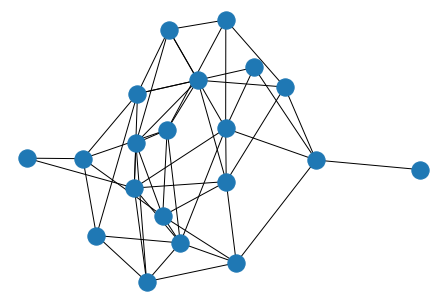

In [22]:
%matplotlib inline
import networkx as nx
import random
import string

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

# #1.1.2 The initial state

In [2]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

In [3]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

# # 1.1.3 The state transition function

In [5]:
P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state

In [6]:
test_state = initial_state(G)
state_transition(G, test_state)

{8: 'awake', 9: 'awake', 13: 'awake', 16: 'awake'}

In [7]:
from simulation import Simulation
sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

In [8]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

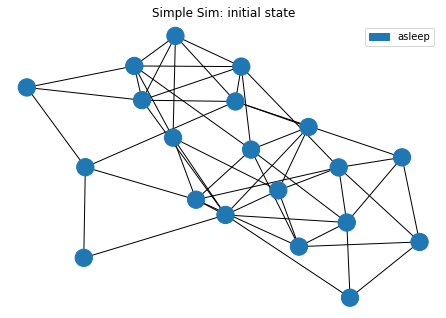

In [9]:
sim.draw()

# 1.2 Running the simulation

In [10]:
sim.run()

In [11]:
#tells us how many times the state transition function has been run
sim.steps

1

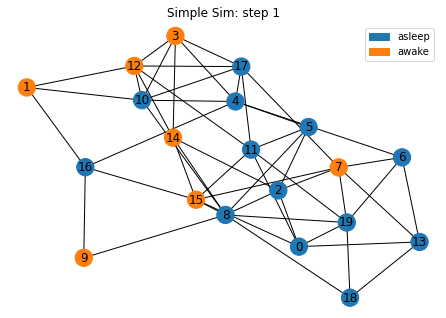

In [12]:
sim.draw(with_labels=True)

In [13]:
sim.state()

{0: 'asleep',
 1: 'awake',
 2: 'asleep',
 3: 'awake',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'awake',
 8: 'asleep',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'awake',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [14]:
sim.run(10)

In [15]:
sim.steps

11

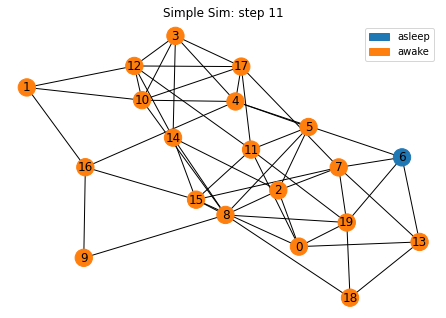

In [16]:
sim.draw(with_labels=True)

# 1.3 Visualizing the results

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

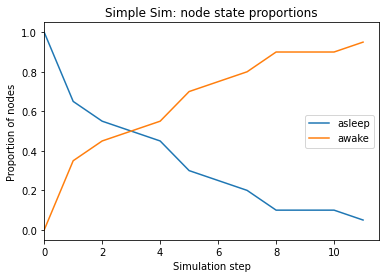

In [17]:
sim.plot()

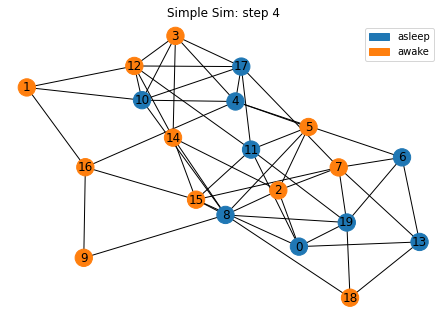

In [18]:
sim.draw(4, with_labels=True)

In [19]:
sim.state(4)

{0: 'asleep',
 1: 'awake',
 2: 'awake',
 3: 'awake',
 4: 'asleep',
 5: 'awake',
 6: 'asleep',
 7: 'awake',
 8: 'asleep',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'awake',
 16: 'awake',
 17: 'asleep',
 18: 'awake',
 19: 'asleep'}

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

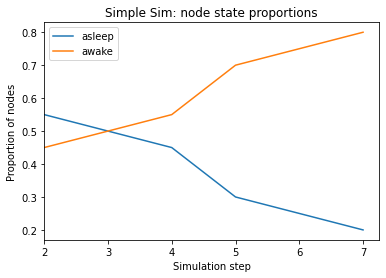

In [20]:
sim.plot(min_step=2, max_step=8)

# 2. The voter model

# 2.1 Create the simulation

# #2.1.1 The Graph

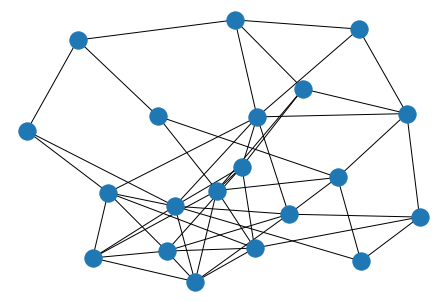

In [21]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

# #2.1.2 Initial state

In [23]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [24]:
initial_state(G)

{0: 'B',
 1: 'A',
 2: 'B',
 3: 'C',
 4: 'A',
 5: 'D',
 6: 'D',
 7: 'A',
 8: 'B',
 9: 'C',
 10: 'B',
 11: 'B',
 12: 'C',
 13: 'A',
 14: 'A',
 15: 'D',
 16: 'A',
 17: 'C',
 18: 'C',
 19: 'B'}

# #2.1.3 State transition

In [25]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [26]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'D',
 1: 'D',
 2: 'A',
 3: 'C',
 4: 'B',
 5: 'D',
 6: 'B',
 7: 'B',
 8: 'B',
 9: 'C',
 10: 'A',
 11: 'A',
 12: 'B',
 13: 'B',
 14: 'D',
 15: 'D',
 16: 'A',
 17: 'D',
 18: 'B',
 19: 'A'}

# #2.1.4 The Simulation instance

In [27]:
import matplotlib.pyplot as plt
sim = Simulation(G, initial_state, state_transition, name='Voter Model')

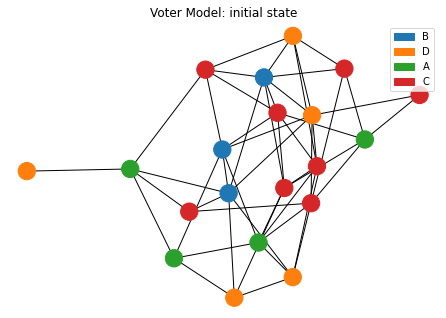

In [28]:
sim.draw()

# 2.2 Run the simulation

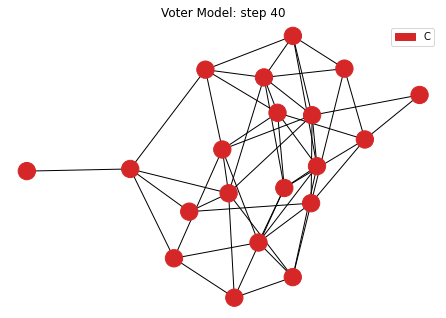

In [29]:
sim.run(40)
sim.draw()

# 2.3 Visualize the results

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

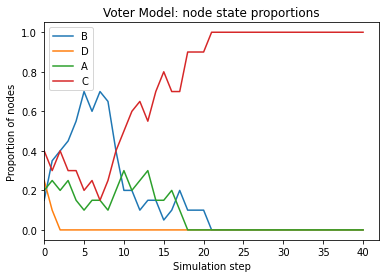

In [30]:
sim.plot()

# 2.4 Synchronous vs. asynchronous updates

In [31]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [32]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [33]:
def state_transition_async(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

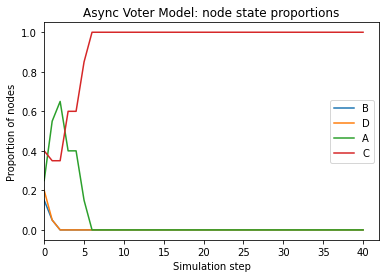

In [34]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()

# 2.5 Stop condition

In [41]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped

In [42]:
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

Stop condition met at step 80.


In [43]:
sim.steps

80

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

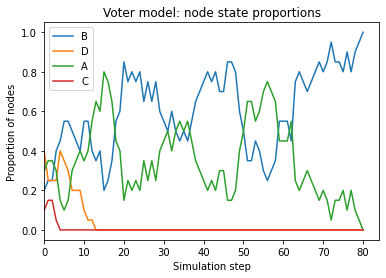

In [44]:
sim.plot()

# 2.6 Rewiring the graph

In [45]:
def state_transition_async_rewiring(G, current_state):
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state

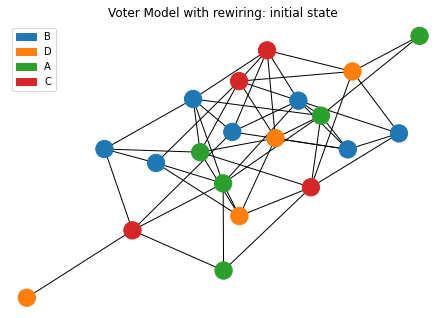

In [46]:
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,name='Voter Model with rewiring')
sim.draw()

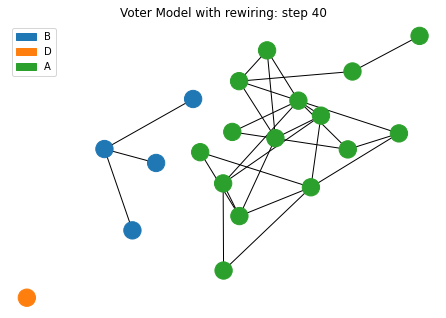

In [47]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

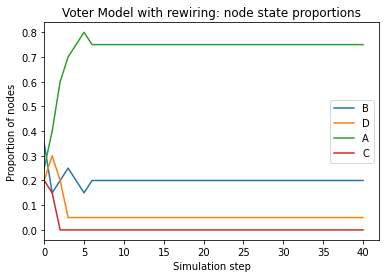

In [48]:
sim.plot()

# 3. The SIS model

# 3.1 Create the Simulation

3.1.1 The Graph

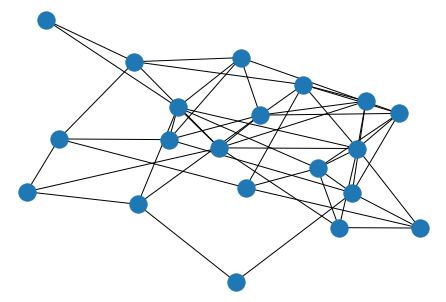

In [49]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

3.1.2 Initial state

In [50]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

In [51]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'I',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

3.1.3 State transition

In [52]:
MU = 0.1
BETA = 0.1
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else:
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

In [53]:
test_state = initial_state(G)
state_transition(G, test_state)

{}

3.1.4 Simulation

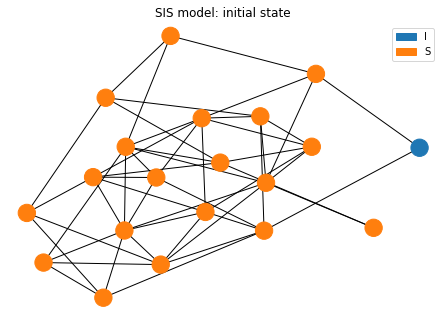

In [55]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')
sim.draw()

# 3.2 Run the simulation

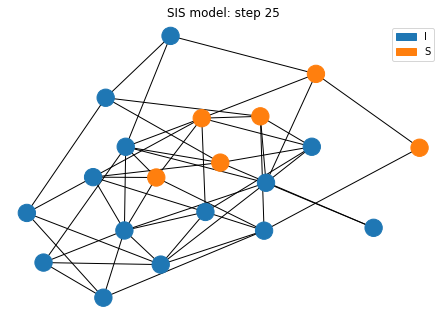

In [56]:
sim.run(25)
sim.draw()

<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

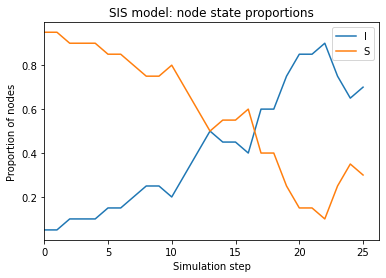

In [57]:
sim.plot()